# Background

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.
自2008年以来，房客和房东都使用Airbnb来扩展旅行的可能性，并呈现更独特、个性化的体验世界的方式。该数据集描述了2019年纽约市的上市活动和指标

# Content

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.
此数据文件包含所有需要的信息，以查找有关房东的更多信息、地理可用性、进行预测和得出结论的必要指标。

# Acknowledgements

This public dataset is part of Airbnb, and the original source can be found on this website.
这个公共数据集是Airbnb的一部分，原始来源可以在这个网站上找到。

# Inspiration

### What can we learn about different hosts and areas?
关于不同的房东和区域，我们能了解到什么?
### What can we learn from predictions? (ex: locations, prices, reviews, etc)
我们能从预测中学到什么?(例如:地点、价格、评论等)
### Which hosts are the busiest and why?
哪些房东最忙，为什么?
### Is there any noticeable difference of traffic among different areas and what could be the reason for it?
不同地区之间的交通是否有明显的差异，原因是什么?

# Acquaring and Loading Data
获取和加载数据

In [182]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import datetime
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [183]:
airbnb = pd.read_csv('./AB_NYC_2019.csv', header=0)  
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [184]:
#checking amount of rows in given dataset to understand the size we are working with
len(airbnb)

48895

In [185]:
#checking type of every column in the dataset
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Understadning, Wrangling and Cleaning Data
理解、整理和清理数据

In [186]:
#after looking at the head of the dataset we already were able to notice some NaN values, therefore need to examine missing values further before continuing with analysis

#looking to find out first what columns have null values
#using 'sum' function will show us how many nulls are found in each column in dataset
#airbnb.isnull()
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [187]:
# data=data.dropna(axis=0, how='any')
# data=data.dropna(axis=0, how='all')
# data=data.dropna(axis=1, how='any')
# data=data.dropna(axis=1, how='all')
# data=data.fillna(value=20)
# data

In [189]:
def to_today(date1):
    date2= datetime.datetime.strptime('2019-12-31',"%Y-%m-%d")
    if date1<date2:
        num=(date2-date1).days
        return num
    else:
        return 100000
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'])
airbnb['last_review_to_today'] = airbnb['last_review'].apply(lambda x:to_today(x))
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)
#examing the changes
airbnb.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_to_today
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,438
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,224
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,100000


In [190]:
#replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
airbnb.reviews_per_month.isnull().sum()

0

In [191]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [192]:
#examining the unique values of neighbourhood as this column will appear very handy for later analysis
len(airbnb.neighbourhood.unique())

221

In [193]:
#examining the unique values of room_type as this column will appear very handy for later analysis
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

# Exploring and Visualizing Data

In [194]:
airbnb

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_to_today
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,438
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,224
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,100000
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,179
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9,100000
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36,100000
48892,Sunny Studio at Historical Neighborhood,23492952,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27,100000
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2,100000


### Category Features 的计数情况

##### host_id 

In [195]:
#we will skip first column for now and begin from host_id

#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [196]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

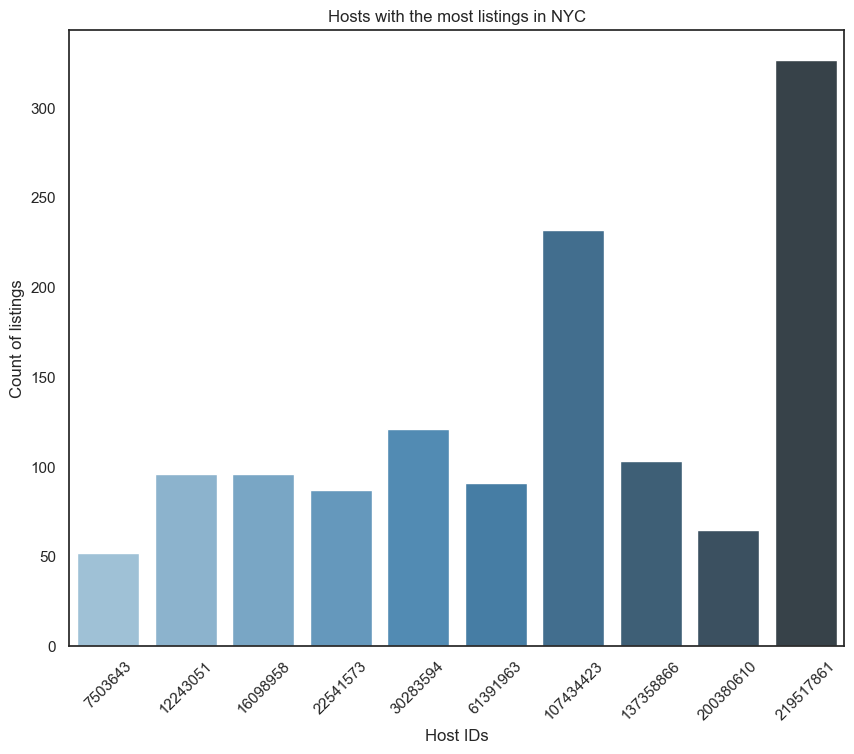

In [197]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

##### neighbourhood_group

[Text(0, 0, 'Manhattan'),
 Text(1, 0, 'Brooklyn'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Bronx'),
 Text(4, 0, 'Staten Island')]

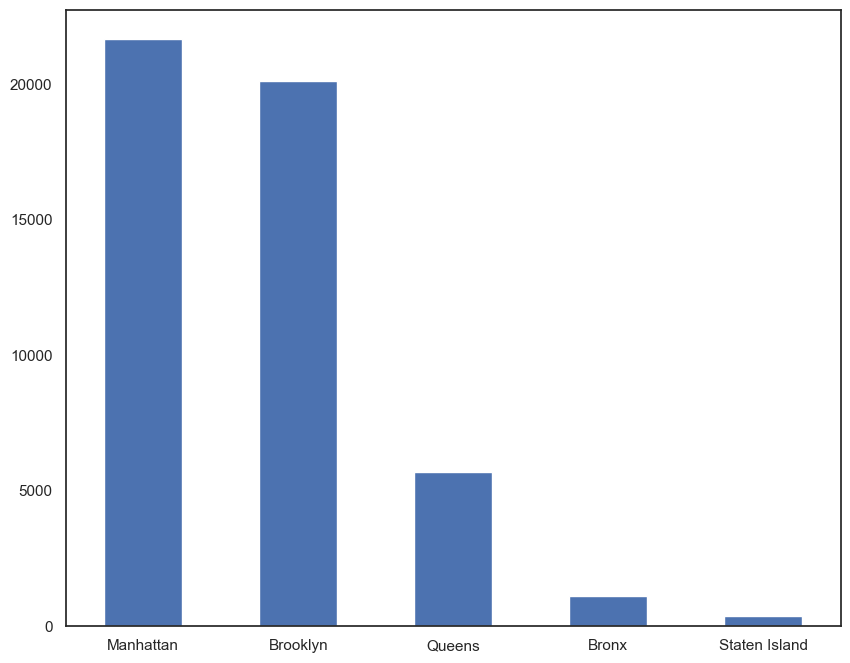

In [198]:
viz_nbhg = airbnb.neighbourhood_group.value_counts().plot(kind = 'bar')
viz_nbhg.set_xticklabels(viz_nbhg.get_xticklabels(), rotation=0)

##### room_type

[Text(0, 0, 'Entire home/apt'),
 Text(1, 0, 'Private room'),
 Text(2, 0, 'Shared room')]

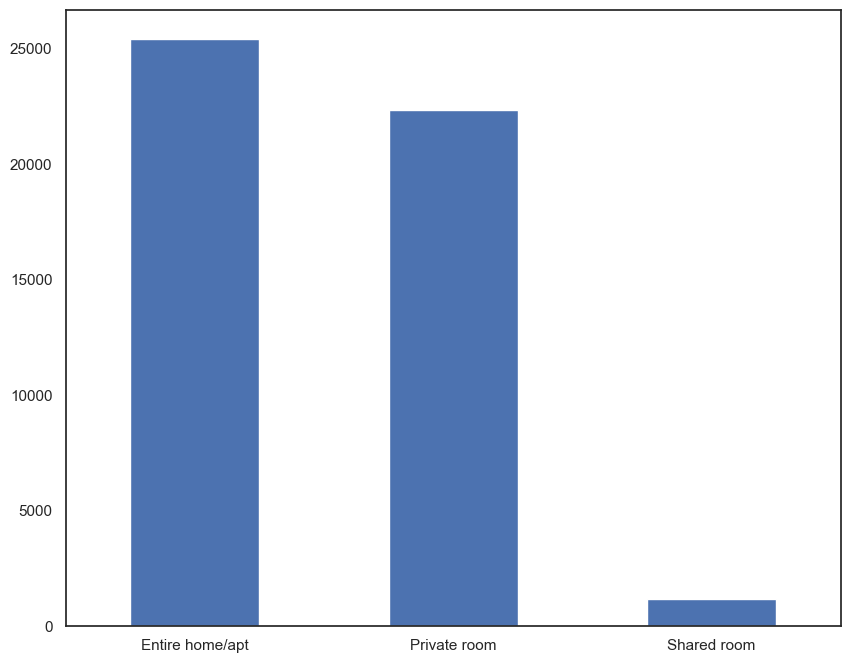

In [199]:
viz_rm = airbnb.room_type.value_counts().plot(kind=  'bar')
viz_rm.set_xticklabels(viz_rm.get_xticklabels(), rotation = 0)

##### neighbourhood

[Text(0, 0, 'Williamsburg'),
 Text(1, 0, 'Bedford-Stuyvesant'),
 Text(2, 0, 'Harlem'),
 Text(3, 0, 'Bushwick'),
 Text(4, 0, 'Upper West Side'),
 Text(5, 0, "Hell's Kitchen"),
 Text(6, 0, 'East Village'),
 Text(7, 0, 'Upper East Side'),
 Text(8, 0, 'Crown Heights'),
 Text(9, 0, 'Midtown')]

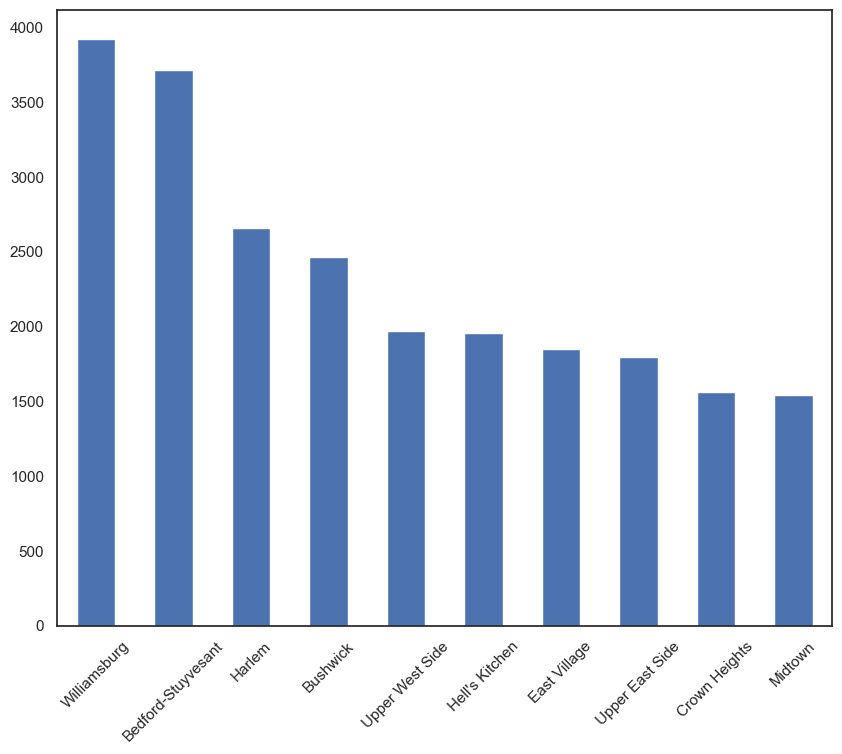

In [200]:
viz_nbh = airbnb.neighbourhood.value_counts().head(10).plot(kind= 'bar')
viz_nbh.set_xticklabels(viz_nbh.get_xticklabels(), rotation=45)

In [201]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

327

In [202]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

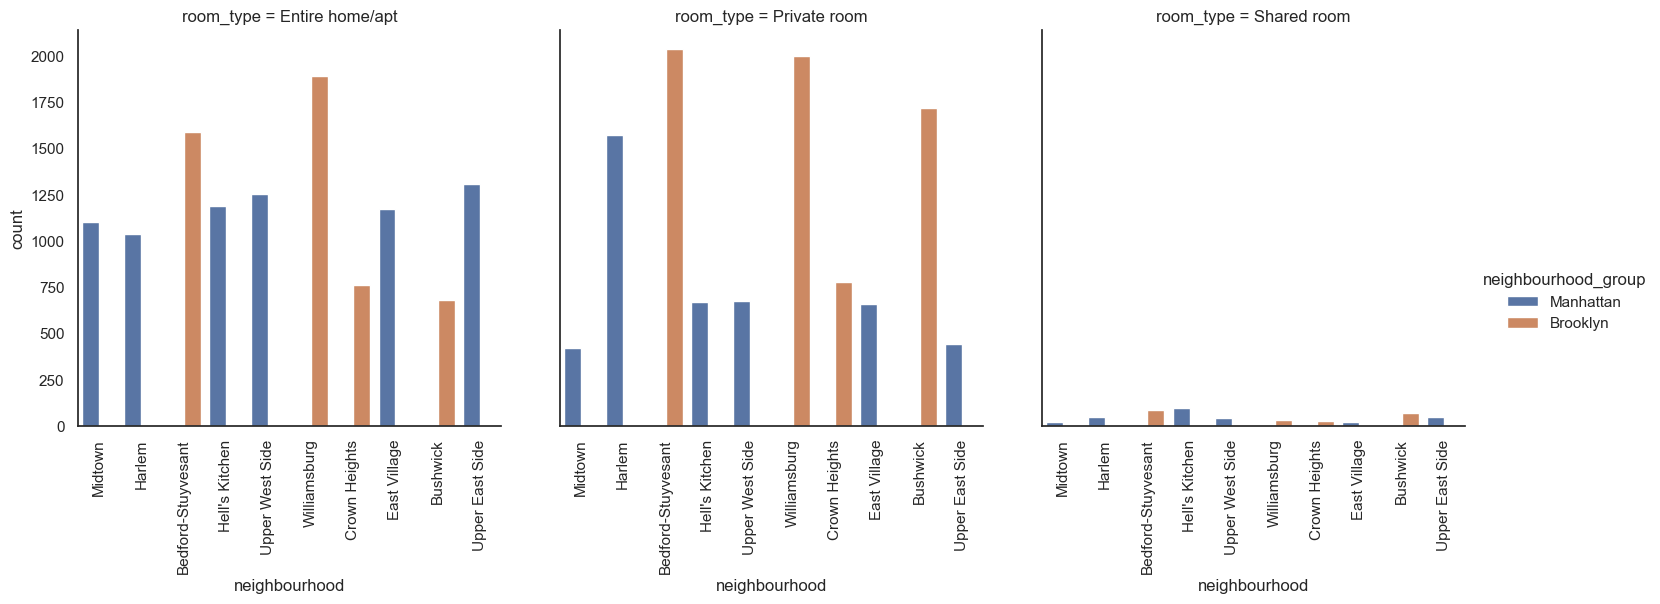

In [211]:
#let's now combine this with our boroughs and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

### Number Features 

##### latitude - longitude
##### price
##### minimum_nights
##### number_of_reviews
##### reviews_per_month
##### calculated_host_listings_count
##### availability_365
##### last_review_to_today 

图中数据集占比分别为：97.47%, 100.00%, 93.77%, 93.50%,99.04%,76.54%,


<AxesSubplot:xlabel='neighbourhood_group', ylabel='last_review_to_today'>

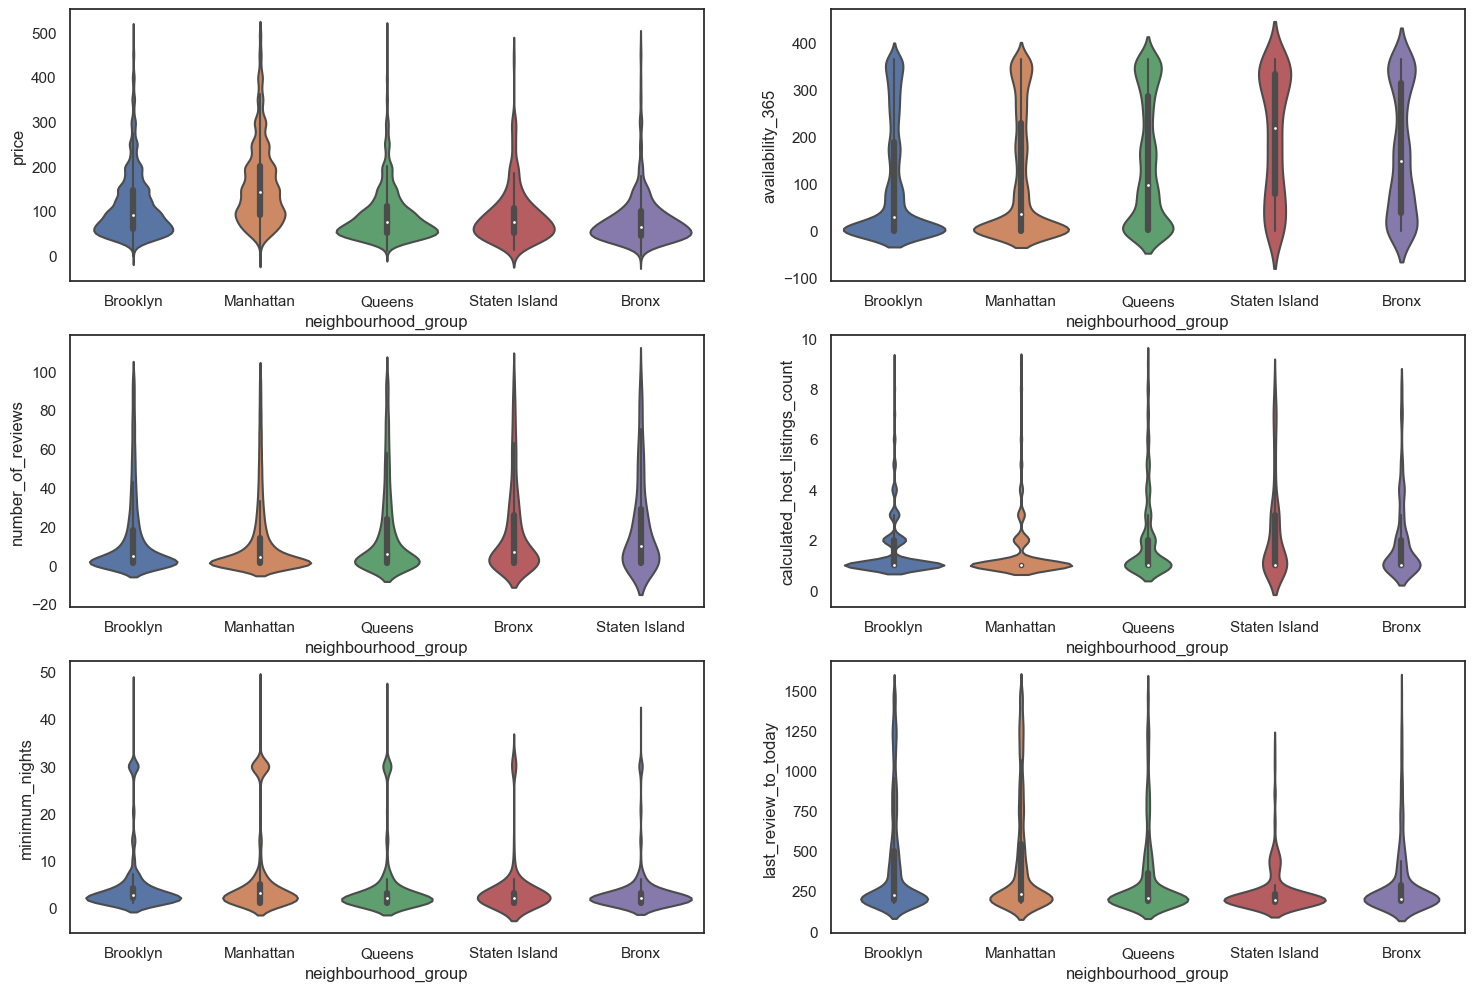

In [207]:
fig=plt.figure(4,figsize=(18,12))
ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax6=fig.add_subplot(3,2,6)

ax_1_per = 100*len(airbnb[airbnb.price<500])/len(airbnb)
ax_2_per = 100*len(airbnb)/len(airbnb)
ax_3_per = 100*len(airbnb[airbnb.number_of_reviews<100])/len(airbnb)
ax_4_per = 100*len(airbnb[airbnb.calculated_host_listings_count<10])/len(airbnb)
ax_5_per = 100*len(airbnb[airbnb.minimum_nights < 50])/len(airbnb)
ax_6_per = 100*len(airbnb[airbnb.last_review_to_today<1500])/len(airbnb)
print('图中数据集占比分别为：%.2f%%, %.2f%%, %.2f%%, %.2f%%,%.2f%%,%.2f%%,' %(ax_1_per, ax_2_per, ax_3_per, ax_4_per, ax_5_per, ax_6_per))
sns.violinplot(x = 'neighbourhood_group', y = 'price',data = airbnb[airbnb.price<500], ax = ax1)
sns.violinplot(x = 'neighbourhood_group', y = 'availability_365',data = airbnb, ax = ax2)
sns.violinplot(x = 'neighbourhood_group', y = 'number_of_reviews',data = airbnb[airbnb.number_of_reviews<100], ax= ax3)
sns.violinplot(x = 'neighbourhood_group', y = 'calculated_host_listings_count',data = airbnb[airbnb.calculated_host_listings_count<10], ax= ax4)
sns.violinplot(x = 'neighbourhood_group', y = 'minimum_nights',data = airbnb[airbnb.minimum_nights < 50], ax= ax5)
sns.violinplot(x = 'neighbourhood_group', y = 'last_review_to_today',data = airbnb[airbnb.last_review_to_today<1500], ax= ax6)

图中数据集占比分别为：97.47%, 100.00%, 93.77%, 93.50%,99.04%,76.54%,


<AxesSubplot:xlabel='room_type', ylabel='last_review_to_today'>

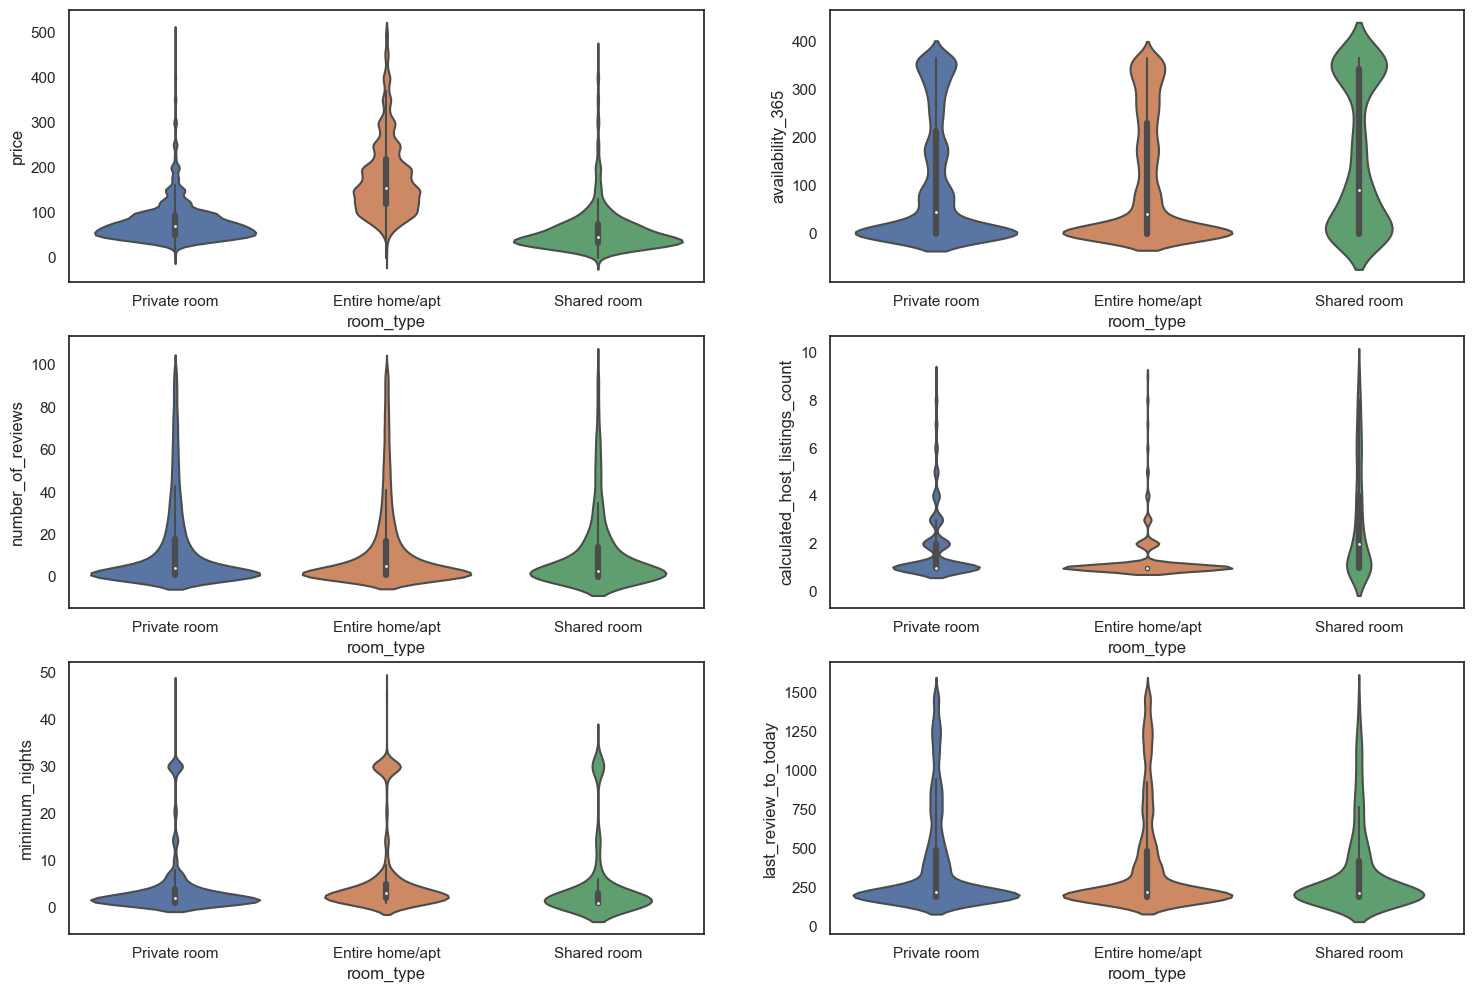

In [208]:
fig=plt.figure(4,figsize=(18,12))
ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax6=fig.add_subplot(3,2,6)

ax_1_per = 100*len(airbnb[airbnb.price<500])/len(airbnb)
ax_2_per = 100*len(airbnb)/len(airbnb)
ax_3_per = 100*len(airbnb[airbnb.number_of_reviews<100])/len(airbnb)
ax_4_per = 100*len(airbnb[airbnb.calculated_host_listings_count<10])/len(airbnb)
ax_5_per = 100*len(airbnb[airbnb.minimum_nights < 50])/len(airbnb)
ax_6_per = 100*len(airbnb[airbnb.last_review_to_today<1500])/len(airbnb)
print('图中数据集占比分别为：%.2f%%, %.2f%%, %.2f%%, %.2f%%,%.2f%%,%.2f%%,' %(ax_1_per, ax_2_per, ax_3_per, ax_4_per, ax_5_per, ax_6_per))
sns.violinplot(x = 'room_type', y = 'price',data = airbnb[airbnb.price<500], ax = ax1)
sns.violinplot(x = 'room_type', y = 'availability_365',data = airbnb, ax = ax2)
sns.violinplot(x = 'room_type', y = 'number_of_reviews',data = airbnb[airbnb.number_of_reviews<100], ax= ax3)
sns.violinplot(x = 'room_type', y = 'calculated_host_listings_count',data = airbnb[airbnb.calculated_host_listings_count<10], ax= ax4)
sns.violinplot(x = 'room_type', y = 'minimum_nights',data = airbnb[airbnb.minimum_nights < 50], ax= ax5)
sns.violinplot(x = 'room_type', y = 'last_review_to_today',data = airbnb[airbnb.last_review_to_today<1500], ax= ax6)

Text(0.5, 1.05, 'Pearson Correlation of Number Features')

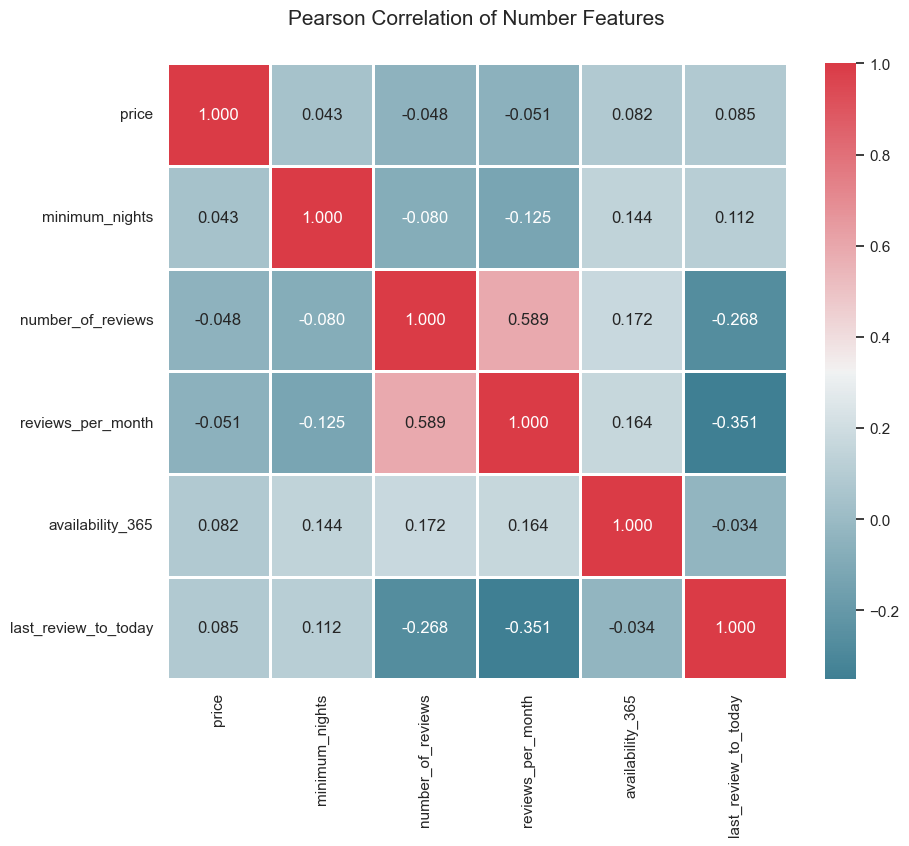

In [210]:
num_field = ['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','last_review_to_today',]
f,ax = plt.subplots(figsize=(10, 8))
sns.heatmap(airbnb[num_field].corr(),annot=True,
                    cmap = sns.diverging_palette(220, 10, as_cmap = True),
                    linewidths=.9, fmt= '.3f',ax = ax)
plt.title('Pearson Correlation of Number Features', y=1.05, size=15)

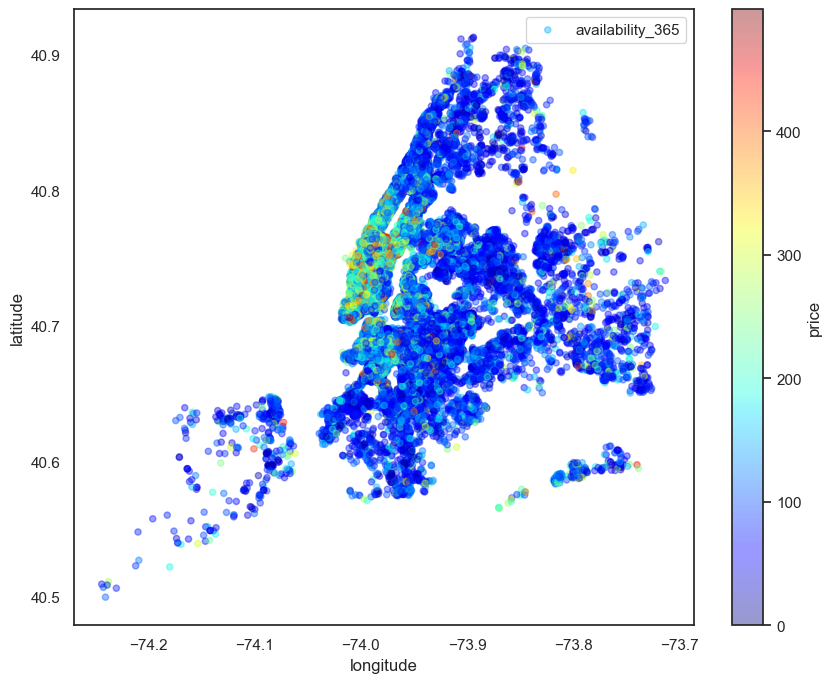

In [87]:
#let's what we can do with our given longtitude and latitude columns

#let's see how scatterplot will come out 
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

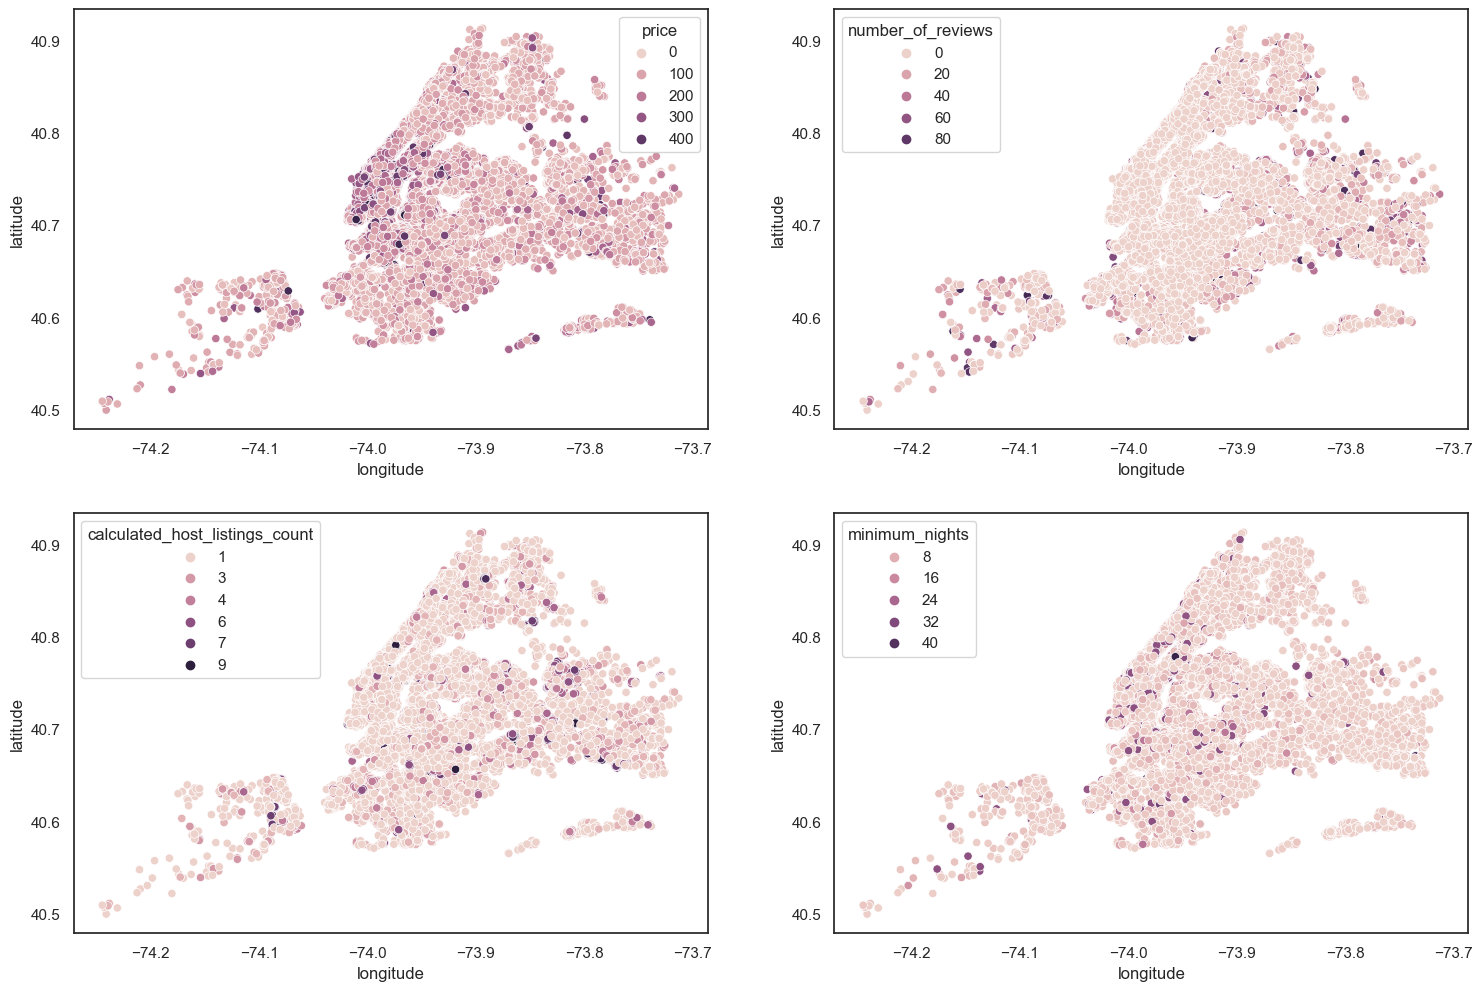

In [213]:
fig=plt.figure(4,figsize=(18,12))

ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

sns.scatterplot(x= 'longitude', y='latitude', hue = 'price', data = airbnb[airbnb.price < 500], ax=ax1)
sns.scatterplot(x= 'longitude', y='latitude', hue = 'number_of_reviews', data =airbnb[airbnb.number_of_reviews<100], ax=ax2)
sns.scatterplot(x= 'longitude', y='latitude', hue = 'calculated_host_listings_count', data =airbnb[airbnb.calculated_host_listings_count<10], ax=ax3)
sns.scatterplot(x= 'longitude', y='latitude', hue = 'minimum_nights', data =airbnb[airbnb.minimum_nights < 50], ax=ax4)

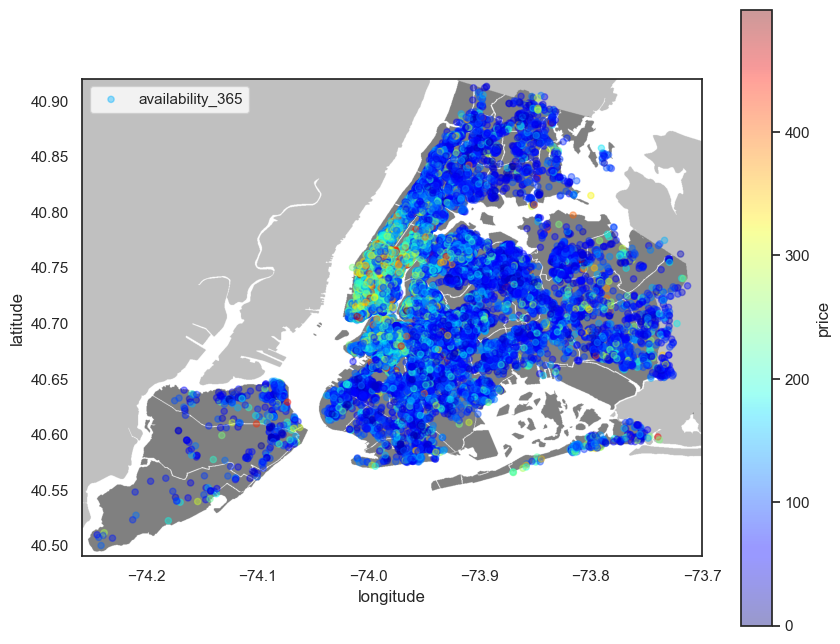

In [96]:
import urllib.request
import io
import matplotlib.pyplot as plt

# Initializing the figure size
plt.figure(figsize=(10,8))

# Loading the PNG NYC image from the web
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'
with urllib.request.urlopen(url) as response:
    nyc_img_data = response.read()  # Read data from URL response
    nyc_img = plt.imread(io.BytesIO(nyc_img_data))  # Read image into numpy array

# Scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()

# Assuming sub_6 is a DataFrame with the necessary columns
# Replace 'sub_6' with your actual DataFrame name
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()


In [89]:
#let's comeback now to the 'name' column as it will require litte bit more coding and continue to analyze it!

#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in airbnb.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [90]:
#we are going to use counter
from collections import Counter
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [91]:
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(1, 0, 'room'),
 Text(2, 0, 'bedroom'),
 Text(3, 0, 'private'),
 Text(4, 0, 'apartment'),
 Text(5, 0, 'cozy'),
 Text(6, 0, 'the'),
 Text(7, 0, 'to'),
 Text(8, 0, 'studio'),
 Text(9, 0, 'brooklyn'),
 Text(10, 0, 'apt'),
 Text(11, 0, 'spacious'),
 Text(12, 0, '1'),
 Text(13, 0, 'with'),
 Text(14, 0, '2'),
 Text(15, 0, 'of'),
 Text(16, 0, 'east'),
 Text(17, 0, 'and'),
 Text(18, 0, 'manhattan'),
 Text(19, 0, '&'),
 Text(20, 0, 'park'),
 Text(21, 0, 'sunny'),
 Text(22, 0, 'beautiful'),
 Text(23, 0, 'near'),
 Text(24, 0, 'williamsburg')]

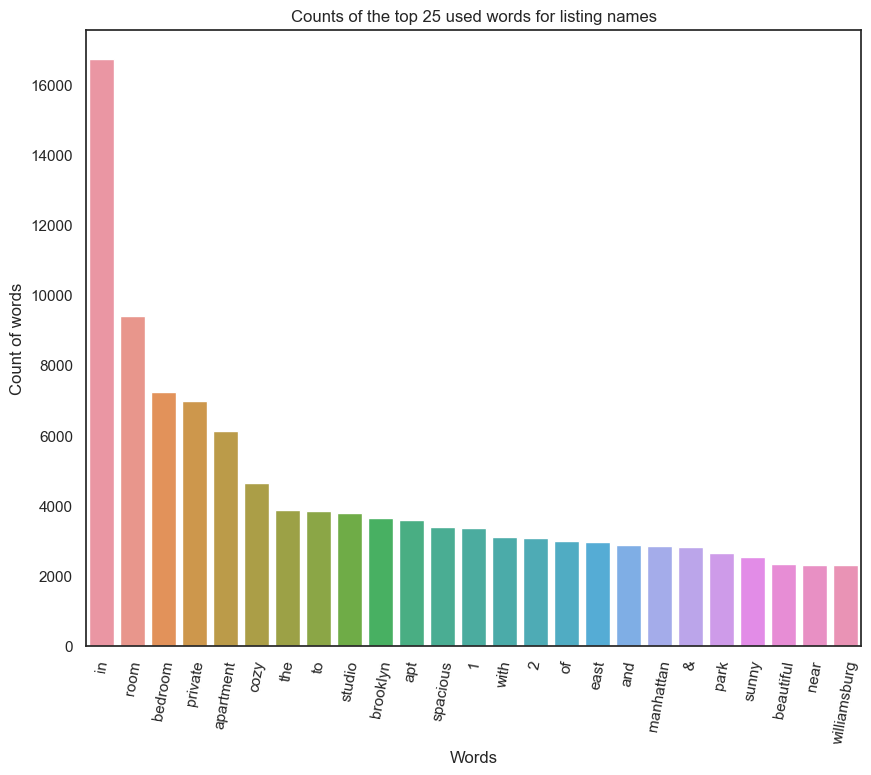

In [92]:
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

In [93]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [94]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


# Conclusion